# Problem:
<p> Our client is a credit card company. They have brought us a dataset that includes some demographics and recent financial data (the past six months) for a sample of 30,000 of their account holders. This data is at the credit account level; in other words, there is one row for each account (you should always clarify what the definition of a row is, in a dataset). Rows are labeled by whether in the next month after the six month historical data period, an account owner has defaulted, or in other words, failed to make the minimum payment.</p>


# Goal:

<p>Your goal is to develop a predictive model for whether an account will default next month, given
    demographics and historical data.You will developed the practical application of the model.<p>

In [1]:
# Importing modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data sets
data = pd.read_csv("./Task 1 Data set/cleaned_data.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
data.columns # Name of all the columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
# Getting all nonzero elements from 'PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6' and storing it into df
columns=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df = data.replace(0, np.nan).dropna(axis=0, how='any', subset=columns).replace(np.nan,0)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,university,0.0,0.0,0.0,1.0
9,62a2fd79-cd90,20000,1,3,2,35,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,1122.0,0.0,0.0,high school,0.0,1.0,0.0,0.0
11,4777689a-5131,260000,2,1,2,51,-1.0,-1.0,-1.0,-1.0,...,8583.0,22301.0,0.0,3640.0,0.0,graduate school,1.0,0.0,0.0,0.0
17,cb258690-8ea2,360000,2,1,1,49,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0
18,f6f0307a-b75f,180000,2,1,2,29,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,graduate school,1.0,0.0,0.0,0.0


In [6]:
# Logarithmic Transformation and droping Nan Values
df['pay_1']=df['PAY_1'].apply(lambda x:np.log(x))
df['pay_2']=df['PAY_2'].apply(lambda x:np.log(x))
df['pay_3']=df['PAY_3'].apply(lambda x:np.log(x))
df['pay_4']=df['PAY_4'].apply(lambda x:np.log(x))
df['pay_5']=df['PAY_5'].apply(lambda x:np.log(x))
df['pay_6']=df['PAY_6'].apply(lambda x:np.log(x))
df.dropna(inplace=True)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,graduate school,high school,others,university,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
57,b4abe25a-789d,50000,1,1,2,29,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
83,174c412f-2d17,200000,1,1,1,53,2.0,2.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
103,cc332450-5380,280000,1,2,1,41,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612
111,46c75da5-bfd0,50000,1,3,2,37,2.0,2.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,1.098612,0.693147,0.693147
145,9c0c1a78-0018,210000,1,3,1,45,2.0,3.0,4.0,4.0,...,0.0,1.0,0.0,0.0,0.693147,1.098612,1.386294,1.386294,1.609438,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,cd41e0dd-2b14,100000,1,2,2,44,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26573,68a17b67-2553,70000,1,3,1,45,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
26641,8dea83fa-2f50,40000,1,2,2,47,2.0,2.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.693147,0.693147,1.098612,0.693147,0.693147,0.693147
26655,46c706d6-6aef,210000,1,2,1,34,3.0,2.0,2.0,2.0,...,0.0,0.0,0.0,1.0,1.098612,0.693147,0.693147,0.693147,0.693147,0.693147


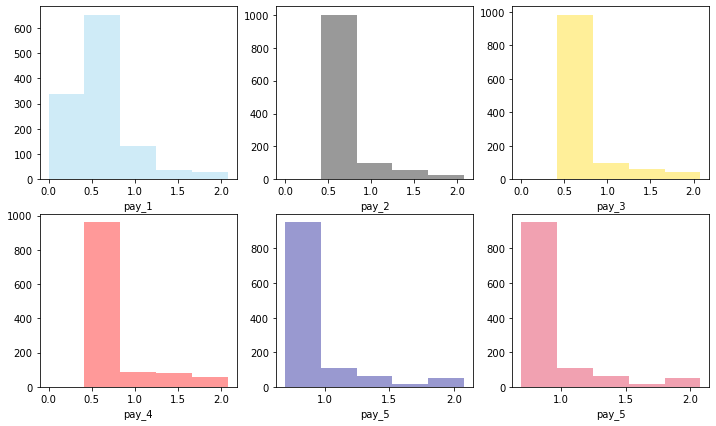

In [30]:
# plot
f, axes = plt.subplots(2, 3, figsize=(12, 7))
sns.distplot( df["pay_1"] , color="skyblue", ax=axes[0, 0],kde=False,bins=5)
sns.distplot( df["pay_2"] , color="black", ax=axes[0, 1],kde=False,bins=5)
sns.distplot( df["pay_3"] , color="gold", ax=axes[0, 2],kde=False,bins=5)
sns.distplot( df["pay_4"] , color="red", ax=axes[1, 0],kde=False,bins=5)
sns.distplot( df["pay_5"] , color="darkblue", ax=axes[1, 1],kde=False,bins=5)
sns.distplot( df["pay_5"] , color="crimson", ax=axes[1, 2],kde=False,bins=5)


# Task 3:

In [32]:
## Performing Logistic Regression using a feature besides Education using sklearn 

In [33]:
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
5,ceae2946-47e4,50000,1,1,2,37,0,0,0,0,...,657,1000,1000,800,0,graduate school,1,0,0,0
6,d3b8ce26-9c89,500000,1,1,2,29,0,0,0,0,...,38000,20239,13750,13770,0,graduate school,1,0,0,0
7,d6e1911b-54d0,100000,2,2,2,23,0,-1,-1,0,...,0,581,1687,1542,0,university,0,0,0,1
8,8421d3b3-2b54,140000,2,3,1,28,0,0,2,0,...,432,1000,1000,1000,0,high school,0,1,0,0
9,62a2fd79-cd90,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,1122,0,0,high school,0,1,0,0


In [34]:
data_set=data.drop(columns="EDUCATION_CAT") #droping Education column
data_set.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,1,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,0,0,0,1


## Getting Data Ready

In [35]:
# Spliting Data into X And y
X=data_set.drop(['default payment next month','ID'],axis=1)
y=data_set["default payment next month"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [37]:
len(X_train),len(y_train),len(X_test),len(y_test)

(19998, 19998, 6666, 6666)

## Using logistic regression to train the model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model = LogisticRegression()

In [40]:
model.fit(X_train,y_train) # Fiting the model

/home/suryanshmishra/Projects/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print(f'Model Accuracy:{model.score(X_test,y_test)*100:.2f}%')

Model Accuracy:78.32%


## Making a prediction

In [42]:
y_preds = model.predict(X_test) #predicting value
y_probs = model.predict_proba(X_test) #predicitng probabilities
y_probs_positive = y_probs[:,1]
y_preds, y_probs, y_probs_positive

(array([0, 0, 0, ..., 0, 0, 0]),
 array([[0.53404695, 0.46595305],
        [0.64791445, 0.35208555],
        [0.74463965, 0.25536035],
        ...,
        [0.58353806, 0.41646194],
        [0.6675926 , 0.3324074 ],
        [0.60070901, 0.39929099]]),
 array([0.46595305, 0.35208555, 0.25536035, ..., 0.41646194, 0.3324074 ,
        0.39929099]))

# Evaluating the model 

**Area under Receiver Operating Charaterstic (ROC) Curve**

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve
precision, recall, threshold = roc_curve(y_test, y_probs_positive)
precision, recall

(array([0.        , 0.        , 0.001341  , ..., 0.99789272, 0.99789272,
        1.        ]),
 array([0.00000000e+00, 6.91562932e-04, 6.91562932e-04, ...,
        9.99308437e-01, 1.00000000e+00, 1.00000000e+00]))

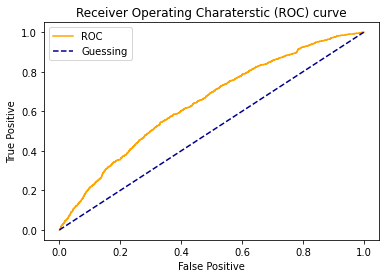

 Test ROC AUC Score percentage:64.20%


In [44]:
def plot_roc_curve(p,r,s):
    '''
    Plots ROC curve given the Precision and Recall of a Set.
    '''
    plt.plot(p,r,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing') # Baseline
    plt.ylabel("True Positive")
    plt.xlabel("False Positive")
    plt.title("Receiver Operating Charaterstic (ROC) curve")
    plt.legend()
    plt.show()
    print(f" {s} ROC AUC Score percentage:{roc_auc_score(y_test,y_probs_positive)*100:.02f}%")
plot_roc_curve(precision,recall,"Test")

**ROC AUC SCORE**

In [45]:
X_preds= model.predict(X_train) # Predicting values on train set
X_probs_positive = model.predict_proba(X_train)[:,1]

In [46]:
from sklearn.metrics import roc_curve,roc_auc_score
precision, recall, threshold = roc_curve(y_train, X_probs_positive)
precision, recall

(array([0.00000000e+00, 6.43915003e-05, 1.28783001e-04, ...,
        9.99420476e-01, 9.99420476e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99977619, 1.        ,
        1.        ]))

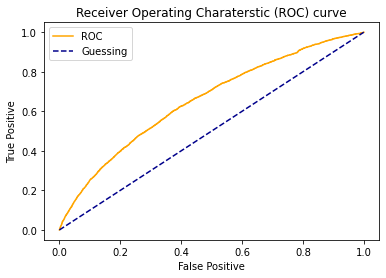

 Train ROC AUC Score percentage:64.20%


In [47]:
plot_roc_curve(precision,recall,"Train")

## There is no difference between Training and Test set ROC AUC Score

# Precision- Recall Curve

Text(0, 0.5, 'Precision')

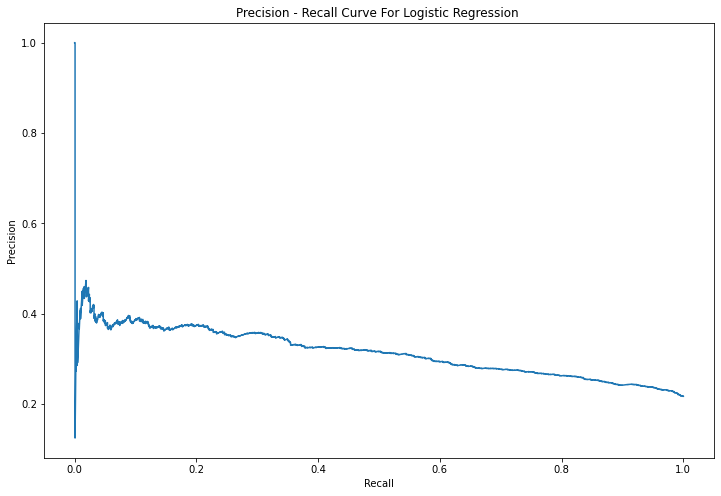

In [48]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_probs_positive)
plt.figure(figsize=(12,8))
plt.title('Precision - Recall Curve For Logistic Regression ')
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')